In [1]:
%load_ext autoreload
%autoreload 2

import math
import uproot
import awkward
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

from scipy.stats import binned_statistic

In [131]:
today = '19_09_06'

In [132]:
!mkdir -p /home/nic/Dropbox/MicroBooNE/_fig/$today/calorimetry

In [138]:
save_folder = '/home/nic/Dropbox/MicroBooNE/_fig/' + today + '/calorimetry/'

In [15]:
branches = [
    b'run',
    b'sub',
    b'evt',
    
    b'slpdg',
    b'nslice',
    
    b'backtracked_pdg',
    b'backtracked_e',
    b'backtracked_purity',
    b'backtracked_completeness',
    b'backtracked_overlay_purity',
    b'backtracked_px',
    b'backtracked_py',
    b'backtracked_pz',
    b'backtracked_start_x',
    b'backtracked_start_y',
    b'backtracked_start_z',
    b'backtracked_start_t',
    b'backtracked_start_U',
    b'backtracked_start_V',
    b'backtracked_start_Y',
    b'backtracked_sce_start_x',
    b'backtracked_sce_start_y',
    b'backtracked_sce_start_z',
    b'backtracked_sce_start_U',
    b'backtracked_sce_start_V',
    b'backtracked_sce_start_Y',

    b'true_nu_vtx_x',
    b'true_nu_vtx_y',
    b'true_nu_vtx_z', 
    b'true_nu_vtx_sce_x',
    b'true_nu_vtx_sce_y',
    b'true_nu_vtx_sce_z',
    
    b'reco_nu_vtx_x',
    b'reco_nu_vtx_y',
    b'reco_nu_vtx_z', 
    b'reco_nu_vtx_sce_x',
    b'reco_nu_vtx_sce_y',
    b'reco_nu_vtx_sce_z',
    
    b'nplanehits_U',
    b'nplanehits_V',
    b'nplanehits_Y',
    b'trk_score',

    b'trk_start_x',
    b'trk_start_y',
    b'trk_start_z',

    b'trk_theta',
    b'trk_phi',

    b'trk_dir_x',
    b'trk_dir_y',
    b'trk_dir_z',

    b'trk_end_x',
    b'trk_end_y',
    b'trk_end_z',

    b'trk_len',
    
    b'dqdx_u',
    b'dqdx_v',
    b'dqdx_y',

    b'dedx_u',
    b'dedx_v',
    b'dedx_y',

    b'rr_u',
    b'rr_v',
    b'rr_y',

    b'pitch_u',
    b'pitch_v',
    b'pitch_y',
]

In [120]:
filename = '/home/nic/Desktop/MicroBooNE/bnb_nue_analysis/v12/bnb_nu/out.root'

In [121]:
folder = "nuselection"
tree = "CalorimetryAnalyzer"

nue = uproot.open(filename)[folder][tree]
branches = nue.keys()
array = nue.arrays(branches)

In [122]:
selection = (array[b'backtracked_completeness'] > 0.9) &(array[b'backtracked_purity'] > 0.9)
muon = ((array[b'backtracked_pdg']) == 13)

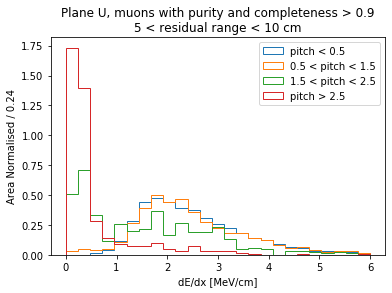

In [139]:
rr = [5, 10]
selection_rr = ((array[b'rr_u'] > rr[0]) & (array[b'rr_u'] < rr[1]))
dqdx = array[b'dedx_u'][selection & muon & selection_rr].flatten()
pitch = array[b'pitch_u'][selection & muon & selection_rr].flatten()

binning = [25, 0, 6]
plt.hist(dqdx[pitch < 0.5],
        bins=binning[0],
        range=[binning[1], binning[2]],
        label='pitch < 0.5',
        histtype='step',
        density=True)

plt.hist(dqdx[(pitch > 0.5) & (pitch < 1.5)],
        bins=binning[0],
        range=[binning[1], binning[2]],
        label='0.5 < pitch < 1.5',
        histtype='step',
        density=True)

plt.hist(dqdx[(pitch > 1.5) & (pitch < 2.5)],
        bins=binning[0],
        range=[binning[1], binning[2]],
        label='1.5 < pitch < 2.5',
        histtype='step',
        density=True)

plt.hist(dqdx[pitch > 2.5],
        bins=binning[0],
        range=[binning[1], binning[2]],
        label='pitch > 2.5',
        histtype='step',
        density=True)

plt.legend()
plt.title('Plane U, muons with purity and completeness > 0.9\n{} < residual range < {} cm'.format(rr[0], rr[1]))
plt.xlabel('dE/dx [MeV/cm]')
plt.ylabel('Area Normalised / {:.2f}'.format((binning[2]-binning[1])/binning[0]))
plt.savefig(save_folder + 'muon_dedx_planeu_pitchcategories_rr_{}_{}.png'.format(rr[0], rr[1]), dpi=250)

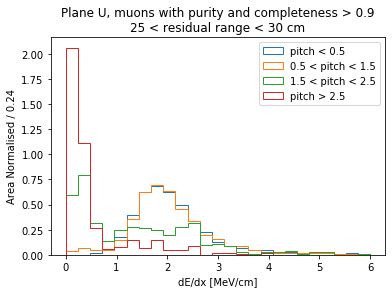

In [140]:
rr = [25, 30]
selection_rr = ((array[b'rr_u'] > rr[0]) & (array[b'rr_u'] < rr[1]))
dqdx = array[b'dedx_u'][selection & muon & selection_rr].flatten()
pitch = array[b'pitch_u'][selection & muon & selection_rr].flatten()

binning = [25, 0, 6]
plt.hist(dqdx[pitch < 0.5],
        bins=binning[0],
        range=[binning[1], binning[2]],
        label='pitch < 0.5',
        histtype='step',
        density=True)

plt.hist(dqdx[(pitch > 0.5) & (pitch < 1.5)],
        bins=binning[0],
        range=[binning[1], binning[2]],
        label='0.5 < pitch < 1.5',
        histtype='step',
        density=True)

plt.hist(dqdx[(pitch > 1.5) & (pitch < 2.5)],
        bins=binning[0],
        range=[binning[1], binning[2]],
        label='1.5 < pitch < 2.5',
        histtype='step',
        density=True)

plt.hist(dqdx[pitch > 2.5],
        bins=binning[0],
        range=[binning[1], binning[2]],
        label='pitch > 2.5',
        histtype='step',
        density=True)

plt.legend()
plt.title('Plane U, muons with purity and completeness > 0.9\n{} < residual range < {} cm'.format(rr[0], rr[1]))
plt.xlabel('dE/dx [MeV/cm]')
plt.ylabel('Area Normalised / {:.2f}'.format((binning[2]-binning[1])/binning[0]))
plt.savefig(save_folder + 'muon_dedx_planeu_pitchcategories_rr_{}_{}.png'.format(rr[0], rr[1]), dpi=250)

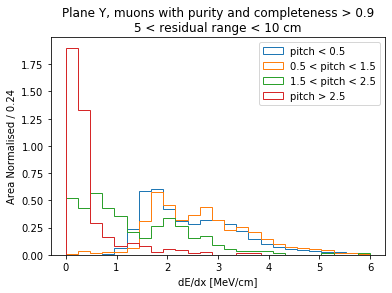

In [141]:
rr = [5, 10]
selection_rr = ((array[b'rr_y'] > rr[0]) & (array[b'rr_y'] < rr[1]))
dqdx = array[b'dedx_y'][selection & muon & selection_rr].flatten()
pitch = array[b'pitch_y'][selection & muon & selection_rr].flatten()

binning = [25, 0, 6]
plt.hist(dqdx[pitch < 0.5],
        bins=binning[0],
        range=[binning[1], binning[2]],
        label='pitch < 0.5',
        histtype='step',
        density=True)

plt.hist(dqdx[(pitch > 0.5) & (pitch < 1.5)],
        bins=binning[0],
        range=[binning[1], binning[2]],
        label='0.5 < pitch < 1.5',
        histtype='step',
        density=True)

plt.hist(dqdx[(pitch > 1.5) & (pitch < 2.5)],
        bins=binning[0],
        range=[binning[1], binning[2]],
        label='1.5 < pitch < 2.5',
        histtype='step',
        density=True)

plt.hist(dqdx[pitch > 2.5],
        bins=binning[0],
        range=[binning[1], binning[2]],
        label='pitch > 2.5',
        histtype='step',
        density=True)

plt.legend()
plt.title('Plane Y, muons with purity and completeness > 0.9\n{} < residual range < {} cm'.format(rr[0], rr[1]))
plt.xlabel('dE/dx [MeV/cm]')
plt.ylabel('Area Normalised / {:.2f}'.format((binning[2]-binning[1])/binning[0]))
plt.savefig(save_folder + 'muon_dedx_planey_pitchcategories_rr_{}_{}.png'.format(rr[0], rr[1]), dpi=250)

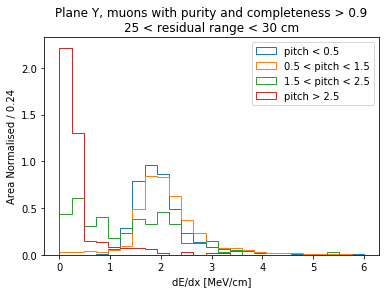

In [142]:
rr = [25, 30]
selection_rr = ((array[b'rr_y'] > rr[0]) & (array[b'rr_y'] < rr[1]))
dqdx = array[b'dedx_y'][selection & muon & selection_rr].flatten()
pitch = array[b'pitch_y'][selection & muon & selection_rr].flatten()

binning = [25, 0, 6]
plt.hist(dqdx[pitch < 0.5],
        bins=binning[0],
        range=[binning[1], binning[2]],
        label='pitch < 0.5',
        histtype='step',
        density=True)

plt.hist(dqdx[(pitch > 0.5) & (pitch < 1.5)],
        bins=binning[0],
        range=[binning[1], binning[2]],
        label='0.5 < pitch < 1.5',
        histtype='step',
        density=True)

plt.hist(dqdx[(pitch > 1.5) & (pitch < 2.5)],
        bins=binning[0],
        range=[binning[1], binning[2]],
        label='1.5 < pitch < 2.5',
        histtype='step',
        density=True)

plt.hist(dqdx[pitch > 2.5],
        bins=binning[0],
        range=[binning[1], binning[2]],
        label='pitch > 2.5',
        histtype='step',
        density=True)

plt.legend()
plt.title('Plane Y, muons with purity and completeness > 0.9\n{} < residual range < {} cm'.format(rr[0], rr[1]))
plt.xlabel('dE/dx [MeV/cm]')
plt.ylabel('Area Normalised / {:.2f}'.format((binning[2]-binning[1])/binning[0]))
plt.savefig(save_folder + 'muon_dedx_planey_pitchcategories_rr_{}_{}.png'.format(rr[0], rr[1]), dpi=250)